## Imports

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm
import os
import re

In [2]:
#sns.set_theme("darkgrid")
sns.set_theme()

# Plotting training curve with confidence interval

## Prepare data

In [3]:
def load_data_files(path):
    data = None
    if os.path.isfile(path):
        data = pd.read_csv(path, index_col=0)
    else:
        for file in os.listdir(path):
            run = pd.read_csv(os.path.join(path, file), index_col=0)
            if data is None:
                data = run
            else:
                data = data.append(run, ignore_index=True)
    return data

## Plot

The `ci` parameter changes the shaded area definition:
 - integer value gives the confidence interval at that interval (default: 95)
 - "sd" gives the standard deviation

In [4]:
def plot_runs(runs, y="Episode Return", ci="sd", 
               ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
               names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 8))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x="Step", y=y, hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

def load_and_plot(model_runs_dir):
    # Load runs
    runs = dict()
    for run_dir in os.listdir(model_runs_dir):
        run = load_data_files(os.path.join(model_runs_dir, run_dir))
        run["Name"] = run_dir
        # Print info
        nb_runs = run.shape[0] / 1000
        last_step = run.iloc[-1]["Step"]
        final_mean_reward = run.query(f"Step == {last_step}")["Value"].mean()
        final_std = run.query(f"Step == {last_step}")["Value"].std()
        print(f'Run {run_dir} with {nb_runs} runs, final mean episode reward = {final_mean_reward}, final std = {final_std}.')
        # Add to list
        runs[run_dir] = run
    # Aggregate and plot
    plot_runs(list(runs.values()))
    return runs

Run h4_nev8_tanh_init1_run100_109 with 10.0 runs, final mean episode reward = -160.7808410644531, final std = 25.93411906651465.
Run h4_nev8_run30_39 with 10.0 runs, final mean episode reward = -177.94925994873046, final std = 17.194163523991087.
Run h8_nev8_run50_59 with 10.0 runs, final mean episode reward = -170.48688812255858, final std = 8.306868110519986.
Run h4_nev16_run40_49 with 10.0 runs, final mean episode reward = -163.2858093261719, final std = 11.433418025399977.
Run h4_nev16_tanh_run80_89 with 10.0 runs, final mean episode reward = -161.04940643310547, final std = 11.786281125272975.
Run h4_nev8_tanh_run65_74 with 10.0 runs, final mean episode reward = -163.4786407470703, final std = 20.07469159454208.
Run h4_nev8_tanh_init5_run90_99 with 10.0 runs, final mean episode reward = -168.1171646118164, final std = 15.130288270799348.


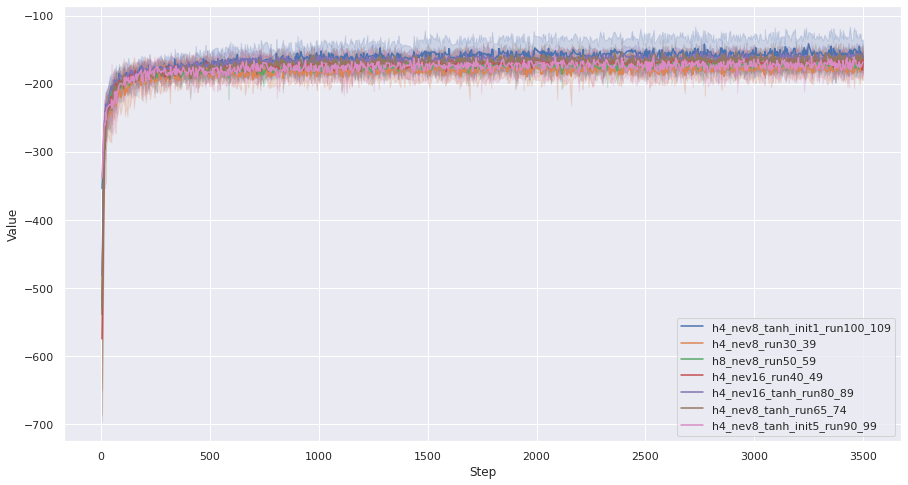

In [33]:
cmaes_runs = load_and_plot("data/cmaes/")

In [34]:
cmaes_runs["h4_nev8_tanh_run65_74"]

,Step,Value,Name
0,4,-433.527740,h4_nev8_tanh_run65_74
1,14,-278.343414,h4_nev8_tanh_run65_74
2,15,-277.049286,h4_nev8_tanh_run65_74
3,18,-310.611145,h4_nev8_tanh_run65_74
4,19,-240.577499,h4_nev8_tanh_run65_74
...,...,...,...
9995,3489,-147.507477,h4_nev8_tanh_run65_74
9996,3491,-151.211105,h4_nev8_tanh_run65_74
9997,3493,-146.617081,h4_nev8_tanh_run65_74
9998,3496,-164.764969,h4_nev8_tanh_run65_74


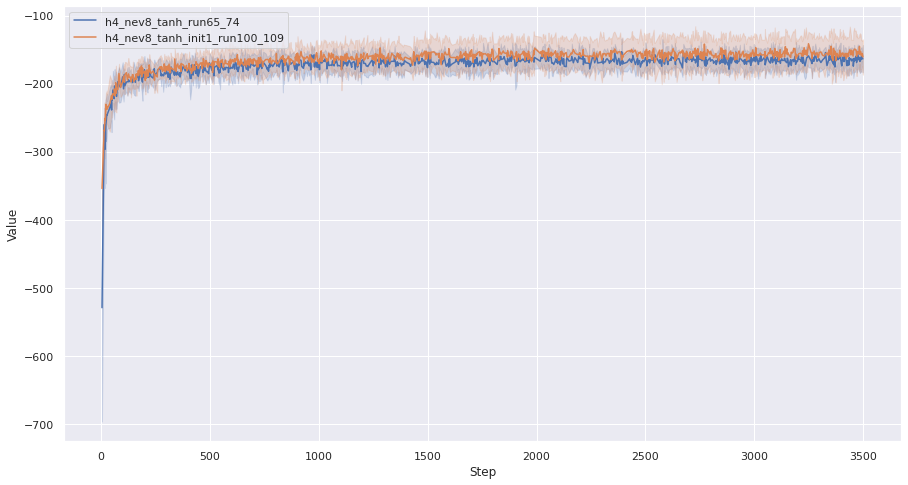

In [36]:
plot_runs([cmaes_runs["h4_nev8_tanh_run65_74"],cmaes_runs["h4_nev8_tanh_init1_run100_109"]])

Run 2addpg_fo_abs_cont_dr_run45_54 with 10.0 runs, final mean episode reward = -139.7624969482422, final std = 34.26023519617733.


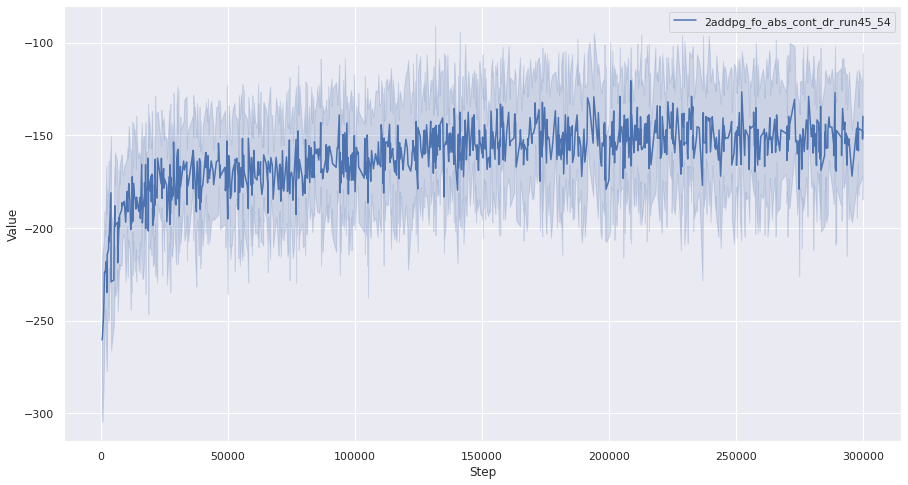

In [49]:
maddpg_runs = load_and_plot("data/maddpg/")

Run qmix_fo_abs_disc_dr_run10_19 with 10.0 runs, final mean episode reward = -149.57798690795897, final std = 35.625042889670276.


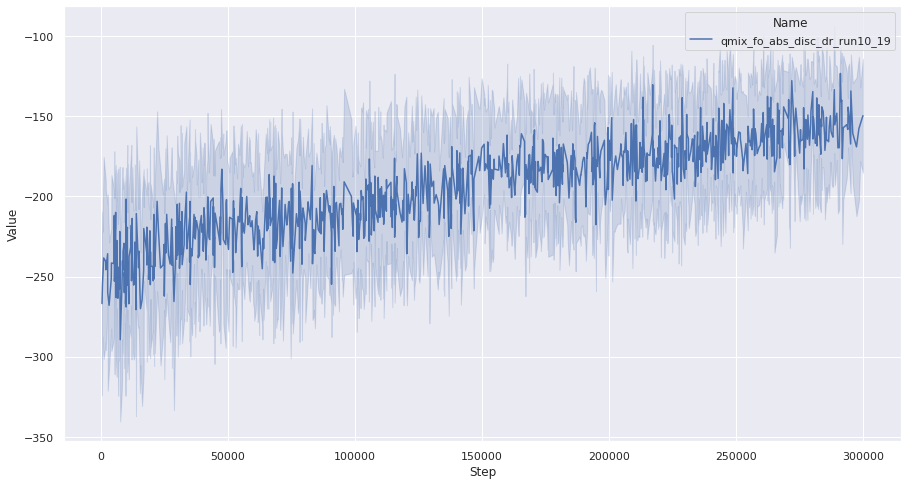

In [17]:
qmix_runs = load_and_plot("data/qmix/")

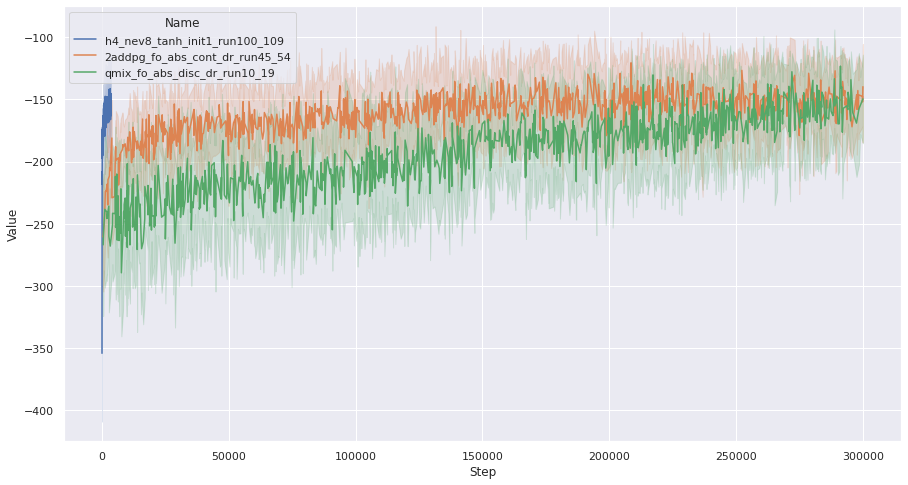

In [18]:
plot_runs([
    cmaes_runs["h4_nev8_tanh_init1_run100_109"],
    maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"],
    qmix_runs["qmix_fo_abs_disc_dr_run10_19"]
])

In [66]:
qmix_runs["qmix_fo_abs_disc_dr_run10_19"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

In [69]:
maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"]["Step"] = [i * 150 for n in range(10) for i in range(1, 1001)]

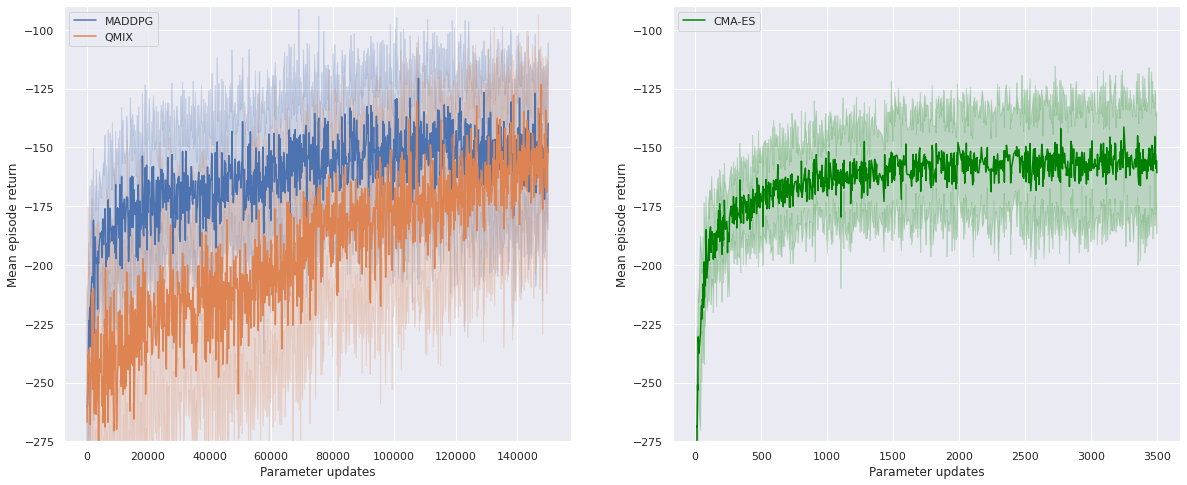

In [70]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ylim = (-275, -90)
plot_runs([maddpg_runs["2addpg_fo_abs_cont_dr_run45_54"], qmix_runs["qmix_fo_abs_disc_dr_run10_19"]], 
            ax=ax1, ylim=ylim, names=['MADDPG', 'QMIX'], loc='upper left', ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')
plot_runs([cmaes_runs["h4_nev8_tanh_init1_run100_109"]], ax=ax2, ylim=ylim, names=['CMA-ES'], 
            loc='upper left', colors=['green'], ax_xlabel='Parameter updates', 
            ax_ylabel='Mean episode return')

In [141]:
qmix_fo_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_fo_rel_disc_shaped/runs_data/")
qmix_po_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_po_rel_disc_shaped/runs_data/")
qmix_poshort_rel_disc_shaped = load_data_files("../models/coop_push_scenario_sparse/qmix_poshort_rel_disc_shaped/runs_data/")
maddpg_fo_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_fo_rel_disc/runs_data/")
maddpg_po_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_po_rel_disc/runs_data/")
maddpg_poshort_rel_disc = load_data_files("../models/coop_push_scenario_sparse/2addpg_poshort_rel_disc/runs_data/")


In [142]:
qmix_fo_rel_disc_shaped["Name"] = "qmix_fo"
qmix_po_rel_disc_shaped["Name"] = "qmix_po"
qmix_poshort_rel_disc_shaped["Name"] = "qmix_poshort"
maddpg_fo_rel_disc["Name"] = "maddpg_fo"
maddpg_po_rel_disc["Name"] = "maddpg_po"
maddpg_poshort_rel_disc["Name"] = "maddpg_poshort"

In [143]:
qmix_fo_rel_disc_shaped["# Training Episode"] = qmix_fo_rel_disc_shaped["Step"] / 100
qmix_po_rel_disc_shaped["# Training Episode"] = qmix_po_rel_disc_shaped["Step"] / 100
qmix_poshort_rel_disc_shaped["# Training Episode"] = qmix_poshort_rel_disc_shaped["Step"] / 100
maddpg_fo_rel_disc["# Training Episode"] = maddpg_fo_rel_disc["Step"] / 100
maddpg_po_rel_disc["# Training Episode"] = maddpg_po_rel_disc["Step"] / 100
maddpg_poshort_rel_disc["# Training Episode"] = maddpg_poshort_rel_disc["Step"] / 100

In [5]:
def plot_runs(runs, x="# Training Episode", y="Episode return", ci="sd", 
               ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
               names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x=x, y=y, hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

In [6]:
def box_plot_runs(runs, x="Training Eps", y="Mean Return", 
             ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
             names=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.boxplot(x=x, y=y, hue="Name", data=runs, ax=ax)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)

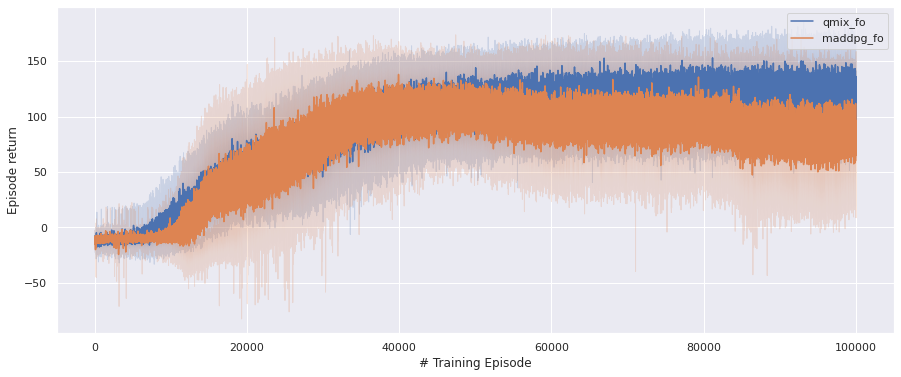

In [63]:
plot_runs([qmix_fo_rel_disc_shaped, maddpg_fo_rel_disc])

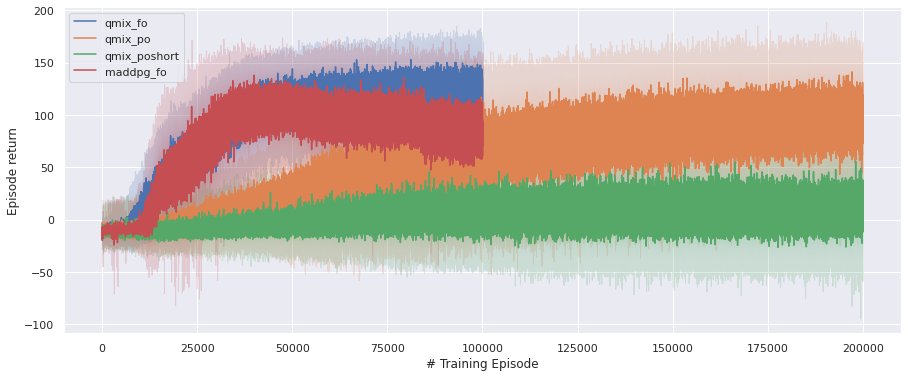

In [123]:
plot_runs([qmix_fo_rel_disc_shaped, qmix_po_rel_disc_shaped, qmix_poshort_rel_disc_shaped, maddpg_fo_rel_disc])

In [7]:
def mov_avg(run_df, mean_range=100):
    new_df = pd.DataFrame(columns=run_df.columns)
    for i in tqdm(range(0, run_df.shape[0], mean_range)):
        if i + mean_range > run_df.index[-1]:
            stop_i = run_df.index[-1]
        else:
            stop_i = i + mean_range
        new_df = new_df.append({
            "Step": run_df.at[stop_i - 1, "Step"],
            "Episode return": run_df.iloc[i:stop_i, 1].mean(),
            "Success": run_df.iloc[i:stop_i, 2].mean(),
            "Episode length": run_df.iloc[i:stop_i, 3].mean(),
            "Name": run_df.at[i, "Name"]
        }, ignore_index=True)
    return new_df

In [124]:
avg_qmix = mov_avg(qmix_fo_rel_disc_shaped)
avg_qmix_po = mov_avg(qmix_po_rel_disc_shaped)
avg_qmix_poshort = mov_avg(qmix_poshort_rel_disc_shaped)

100%|███████████████████████████████████████████████████████████| 22000/22000 [01:29<00:00, 246.91it/s]


In [145]:
avg_maddpg = mov_avg(maddpg_fo_rel_disc)
avg_maddpg_po = mov_avg(maddpg_po_rel_disc)
avg_maddpg_po_short = mov_avg(maddpg_poshort_rel_disc)

100%|█████████████████████████████████████████████████████████████| 8000/8000 [00:32<00:00, 245.09it/s]


In [147]:
avg_qmix.iloc[:-3000]

,Step,Episode return,Success,Episode length,Name,# Training Episode
0,NaN,-10.730947,0.0,100.00,qmix_fo,99.0
1,NaN,-11.076803,0.0,100.00,qmix_fo,199.0
2,NaN,-11.744497,0.0,100.00,qmix_fo,299.0
3,NaN,-10.852177,0.0,100.00,qmix_fo,399.0
4,NaN,-11.049252,0.0,100.00,qmix_fo,499.0
...,...,...,...,...,...,...
7995,NaN,119.771256,1.0,39.58,qmix_fo,99599.0
7996,NaN,121.191869,1.0,40.68,qmix_fo,99699.0
7997,NaN,123.424208,1.0,42.04,qmix_fo,99799.0
7998,NaN,120.125722,1.0,40.47,qmix_fo,99899.0


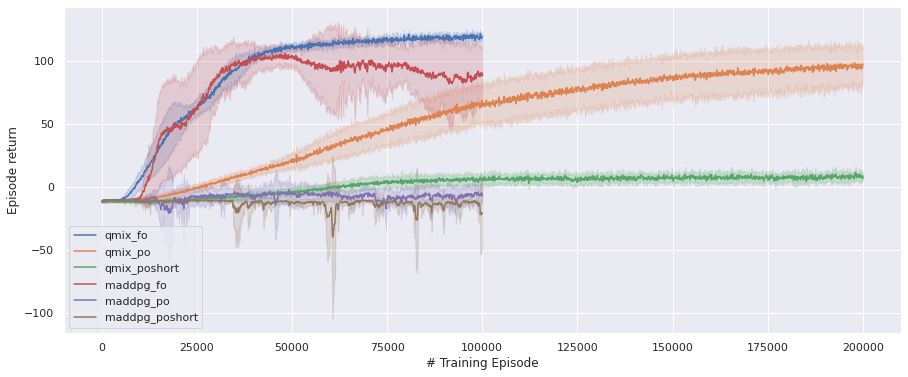

In [148]:
plot_runs([avg_qmix.iloc[:-3000], 
           avg_qmix_po.iloc[:-3000], 
           avg_qmix_poshort.iloc[:-3000], 
           avg_maddpg.iloc[:-3000], 
           avg_maddpg_po, 
           avg_maddpg_po_short])

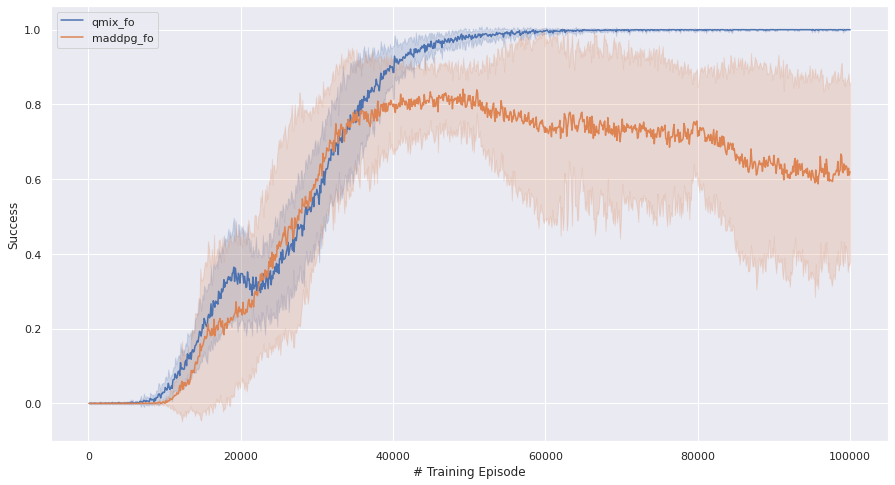

In [59]:
plot_runs([avg_qmix, avg_maddpg], y="Success")

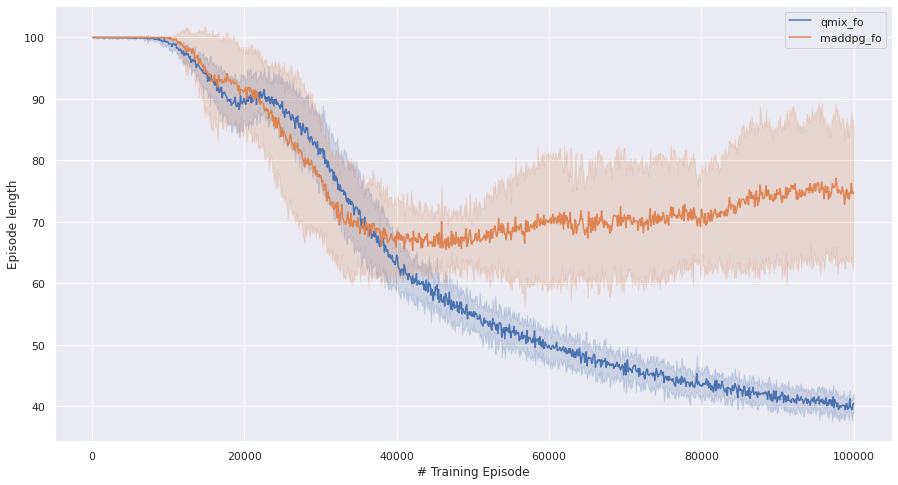

In [60]:
plot_runs([avg_qmix, avg_maddpg], y="Episode length")

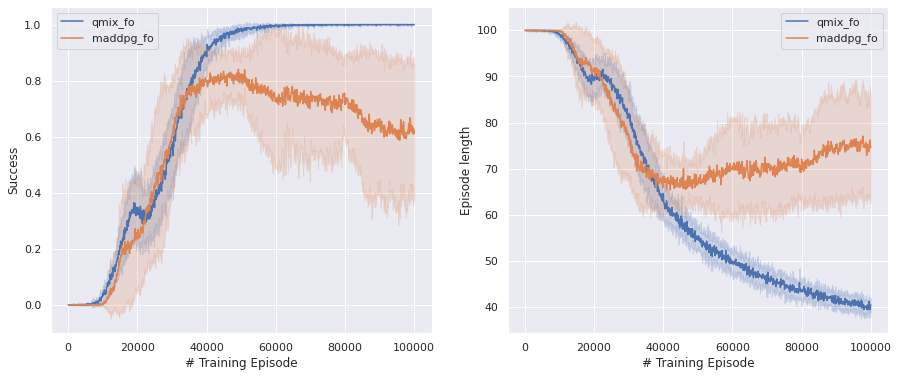

In [65]:
figure, axis = plt.subplots(1, 2, figsize=(15,6))
plot_runs([avg_qmix, avg_maddpg], y="Success", ax=axis[0])
plot_runs([avg_qmix, avg_maddpg], y="Episode length", ax=axis[1])

In [94]:
avg_qmix

,Step,Episode return,Success,Episode length,Name,# Training Episode
0,NaN,-10.730947,0.0,100.00,qmix_fo,99.0
1,NaN,-11.076803,0.0,100.00,qmix_fo,199.0
2,NaN,-11.744497,0.0,100.00,qmix_fo,299.0
3,NaN,-10.852177,0.0,100.00,qmix_fo,399.0
4,NaN,-11.049252,0.0,100.00,qmix_fo,499.0
...,...,...,...,...,...,...
10995,NaN,121.359092,1.0,41.82,qmix_fo,99599.0
10996,NaN,118.918847,1.0,40.60,qmix_fo,99699.0
10997,NaN,120.469968,1.0,41.38,qmix_fo,99799.0
10998,NaN,121.736586,1.0,41.15,qmix_fo,99899.0


In [136]:
avg10000_qmix = mov_avg(qmix_fo_rel_disc_shaped, mean_range=10000)
avg10000_maddpg = mov_avg(maddpg_fo_rel_disc, mean_range=10000)
avg10000_qmix["# Training Episode"] = avg10000_qmix["# Training Episode"] + 1
avg10000_qmix["# Training Episode"] = avg10000_qmix["# Training Episode"].astype(int)
avg10000_maddpg["# Training Episode"] = avg10000_maddpg["# Training Episode"] + 1
avg10000_maddpg["# Training Episode"] = avg10000_maddpg["# Training Episode"].astype(int)

100%|███████████████████████████████████████████████████████████████| 110/110 [00:00<00:00, 293.43it/s]


In [137]:
avg5000_qmix = mov_avg(qmix_fo_rel_disc_shaped, mean_range=5000)
avg5000_maddpg = mov_avg(maddpg_fo_rel_disc, mean_range=5000)
avg5000_qmix["# Training Episode"] = avg5000_qmix["# Training Episode"] + 1
avg5000_qmix["# Training Episode"] = avg5000_qmix["# Training Episode"].astype(int)
avg5000_maddpg["# Training Episode"] = avg5000_maddpg["# Training Episode"] + 1
avg5000_maddpg["# Training Episode"] = avg5000_maddpg["# Training Episode"].astype(int)

100%|███████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 291.26it/s]


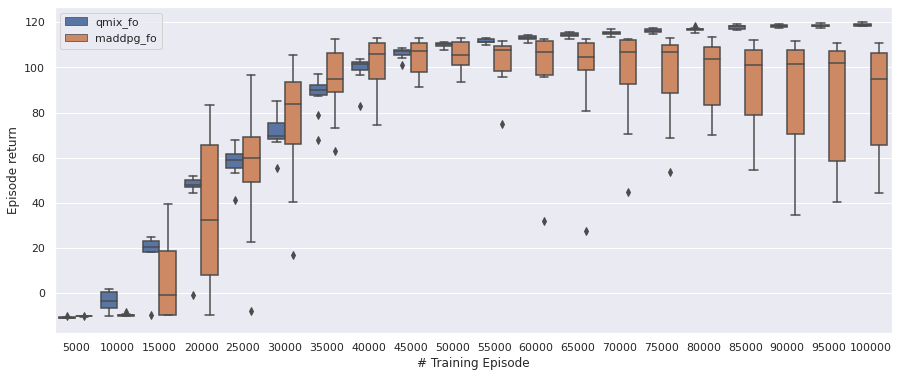

In [138]:
box_plot_runs([avg5000_qmix, avg5000_maddpg], x="# Training Episode", y="Episode return")

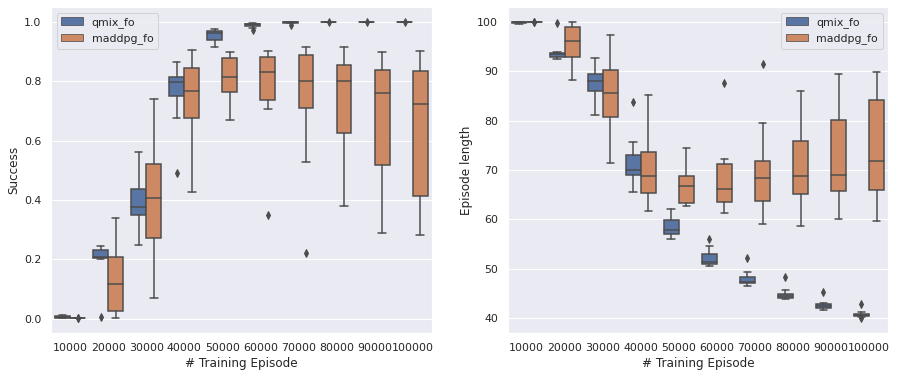

In [139]:
figure, axis = plt.subplots(1, 2, figsize=(15,6))
box_plot_runs(
    [avg10000_qmix, avg10000_maddpg], 
    x="# Training Episode", y="Success", ax=axis[0])
box_plot_runs(
    [avg10000_qmix, avg10000_maddpg], 
    x="# Training Episode", y="Episode length", ax=axis[1])

In [86]:
qmix_fo_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_fo_rel_disc_shaped/eval_perfs.csv")
qmix_po_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_po_rel_disc_shaped/eval_perfs.csv")
qmix_poshort_eval = pd.read_csv("../models/coop_push_scenario_sparse/qmix_poshort_rel_disc_shaped/eval_perfs.csv")
qmix_fo_eval["Name"] = "qmix_fo_eval"
qmix_po_eval["Name"] = "qmix_po_eval"
qmix_poshort_eval["Name"] = "qmix_poshort_eval"

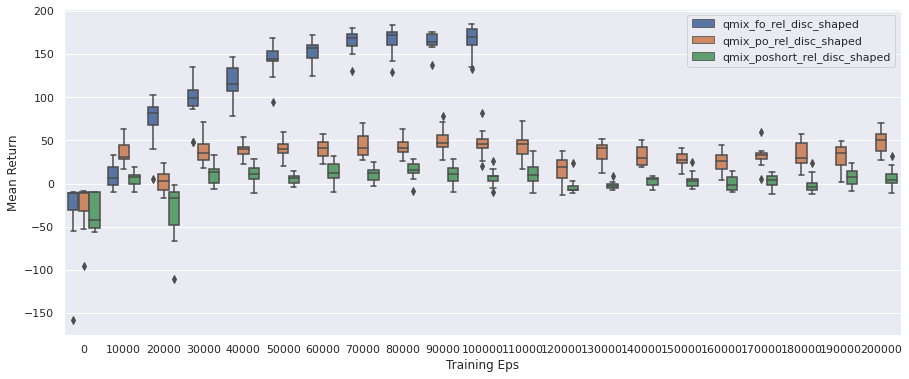

In [82]:
box_plot_runs([qmix_fo_eval,qmix_po_eval,qmix_poshort_eval])

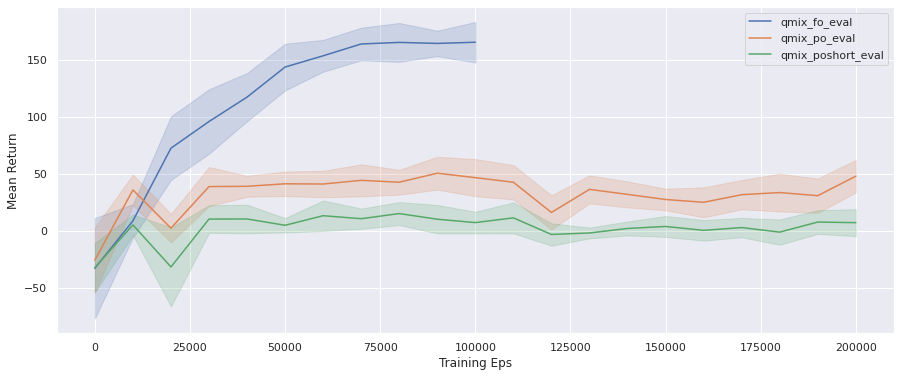

In [87]:
plot_runs([qmix_fo_eval,qmix_po_eval,qmix_poshort_eval], x="Training Eps", y="Mean Return")

In [88]:
maddpg_fo_eval = pd.read_csv("../models/coop_push_scenario_sparse/2addpg_fo_rel_disc/eval_perfs.csv")
maddpg_fo_eval["Name"] = "maddpg_fo_eval"

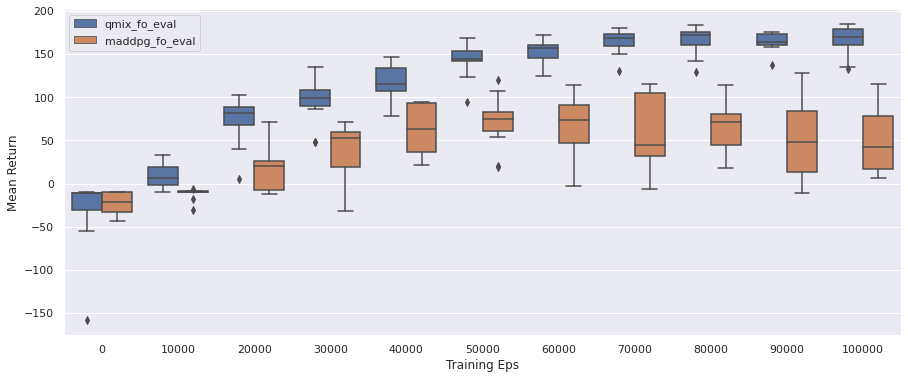

In [89]:
box_plot_runs([qmix_fo_eval, maddpg_fo_eval])

In [8]:
maddpg = load_data_files("../models/coop_push_scenario_sparse/2addpg_fo_rel_disc_frames/all_runs_data/")

In [14]:
maddpg

,Step,Episode return,Success,Episode length
0,100,-17.983692,0,100
1,200,-10.247199,0,100
2,300,-6.163418,0,100
3,400,-10.460601,0,100
4,500,-10.000000,0,100
...,...,...,...,...
1423076,9999830,75.946324,0,100
1423077,9999869,67.511425,1,39
1423078,9999954,113.896462,1,85
1423079,9999983,64.012648,1,29


In [15]:
maddpg["Name"] = "maddpg"

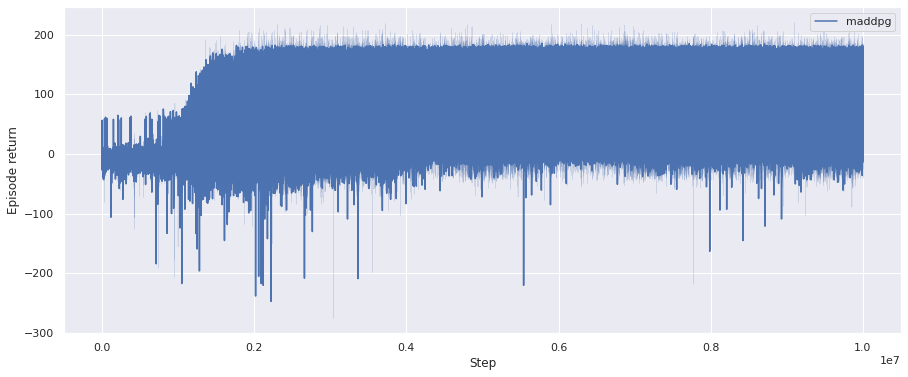

In [25]:
plot_runs(maddpg, x="Step", y="Episode return")

100%|█████████████████████████████████████████████████| 2319/2319 [00:06<00:00, 347.86it/s]


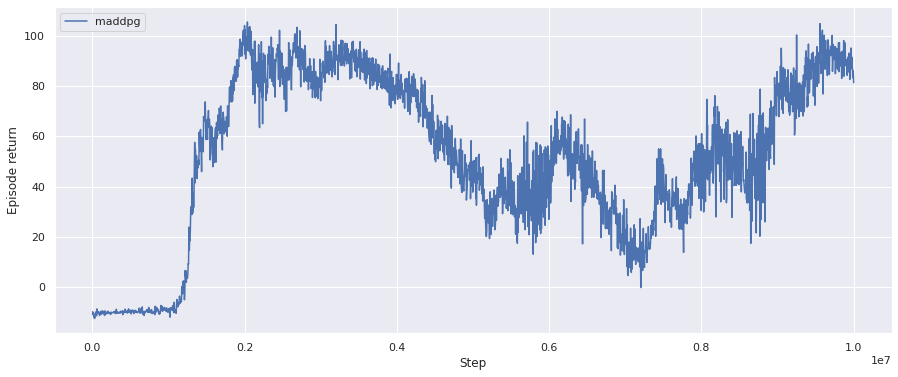

In [21]:
avg_maddpg = mov_avg(maddpg, mean_range=50)
plot_runs(avg_maddpg, x="Step", y="Episode return")

In [8]:
def avg_run_frames(run_df, mean_range=100, max_step=10000000, nb_runs=11):
    new_df = pd.DataFrame(columns=run_df.columns)
    start_index = run_df.index[0]
    for i in range(nb_runs):
        print(f"Run {i + 1}/{nb_runs}")
        for step_i in tqdm(range(mean_range, max_step + mean_range + 1, mean_range)):
            ids = run_df[
                (run_df["Step"] > step_i) & 
                (run_df["Step"] <= step_i + mean_range) & 
                (run_df.index <= start_index + mean_range)].index
            if len(ids) == 0:
                continue
            new_df = new_df.append({
                "Step": step_i,
                "Episode return": run_df.iloc[ids, 1].mean(),
                "Success": run_df.iloc[ids, 2].mean(),
                "Episode length": run_df.iloc[ids, 3].mean(),
                "Name": run_df.at[start_index, "Name"]
            }, ignore_index=True)
            start_index = ids[-1] + 1
    return new_df

In [62]:
a = avg_run_frames(maddpg, mean_range=1000)

Run 0/11


100%|███████████████████████████████████████████████| 10001/10001 [01:19<00:00, 125.14it/s]


Run 1/11


100%|███████████████████████████████████████████████| 10001/10001 [01:25<00:00, 116.59it/s]


Run 2/11


100%|███████████████████████████████████████████████| 10001/10001 [01:29<00:00, 111.19it/s]


Run 3/11


100%|███████████████████████████████████████████████| 10001/10001 [01:34<00:00, 106.00it/s]


Run 4/11


100%|████████████████████████████████████████████████| 10001/10001 [01:43<00:00, 96.37it/s]


Run 5/11


100%|████████████████████████████████████████████████| 10001/10001 [01:51<00:00, 89.87it/s]


Run 6/11


100%|████████████████████████████████████████████████| 10001/10001 [01:57<00:00, 85.39it/s]


Run 7/11


100%|████████████████████████████████████████████████| 10001/10001 [02:01<00:00, 82.26it/s]


Run 8/11


100%|████████████████████████████████████████████████| 10001/10001 [02:00<00:00, 82.71it/s]


Run 9/11


100%|████████████████████████████████████████████████| 10001/10001 [02:06<00:00, 78.77it/s]


Run 10/11


100%|████████████████████████████████████████████████| 10001/10001 [02:13<00:00, 75.19it/s]


In [79]:
a

,Step,Episode return,Success,Episode length,Name
0,1000,-16.099206,0.000000,100.000000,maddpg
1,2000,-11.579282,0.000000,100.000000,maddpg
2,3000,-10.410908,0.000000,100.000000,maddpg
3,4000,-10.722733,0.000000,100.000000,maddpg
4,5000,-10.030654,0.000000,100.000000,maddpg
...,...,...,...,...,...
109995,9996000,92.778055,0.652778,76.458333,maddpg
109996,9997000,94.873963,0.708609,73.278146,maddpg
109997,9998000,97.253048,0.732026,72.862745,maddpg
109998,9999000,96.412479,0.692308,75.699301,maddpg


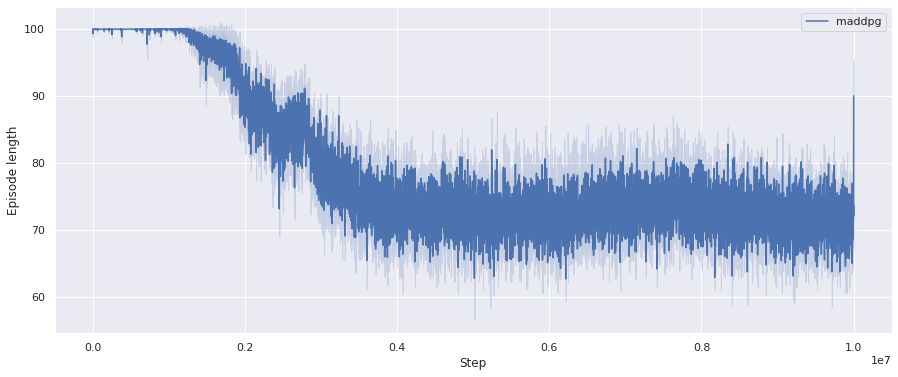

In [80]:
plot_runs(a, x="Step", y="Episode length")

In [9]:
maddpg_gumbel = load_data_files("../models/coop_push_scenario_sparse/maddpg_fo_rel_disc_gumbel/run1/train_data.csv")

In [15]:
maddpg_gumbel["Name"] = "maddpg_gumbel"

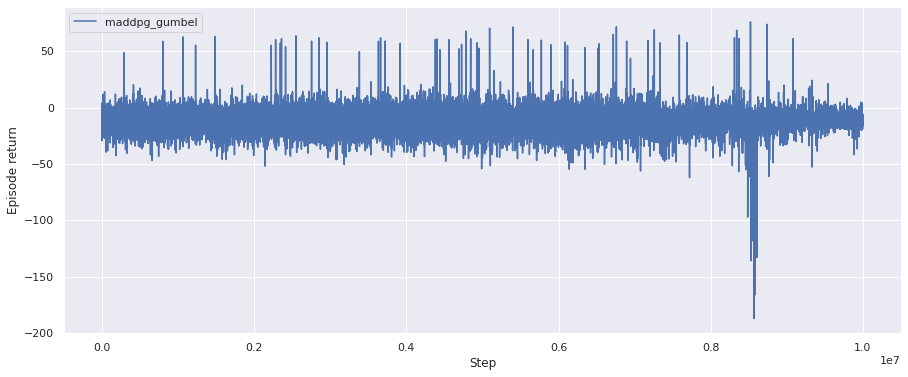

In [16]:
plot_runs(maddpg_gumbel, x="Step", y="Episode return")

In [12]:
maddpg_panoveld = load_data_files("../models/coop_push_scenario_sparse/mymaddpg_manoveld_fo_rel_disc/run1/training_data.csv")
maddpg_panoveld

,Step,Episode return,Episode intrinsic return,Success,Episode length
0,99,14.890859,1.774841e+02,0,100
1,199,11.564689,3.689225e+02,0,100
2,299,9.292799,5.618506e+02,0,100
3,399,10.029096,7.406066e+02,0,100
4,499,-6.300139,9.345819e+02,0,100
...,...,...,...,...,...
128109,9999661,126.757550,1.592083e+06,1,97
128110,9999721,105.729685,1.592089e+06,1,60
128111,9999821,120.605589,1.592103e+06,0,100
128112,9999876,83.550500,1.592109e+06,1,55


# Plot runs trained by frames

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import random
import os
import re
from tqdm import tqdm

sns.set_theme()

def load_data_files(path, name=None):
    data = None
    if os.path.isfile(path):
        data = pd.read_csv(path, index_col=0)
    else:
        for file in os.listdir(path):
            run = pd.read_csv(os.path.join(path, file), index_col=0)
            if data is None:
                data = run
            else:
                data = data.append(run, ignore_index=True)
    if name is not None:
        data["Name"] = name
    return data

def set_fixed_steps(data, max_steps=10000000, step_range=100, n_runs=11):
    index_range = int(step_range / 30) + 1
    drop_ids = []
    start_index = data.index[0]
    for i in tqdm((range(n_runs))):
        for s_i in range(0, max_steps, step_range):
            rows = data[(data.index >= start_index) & (data.index < start_index + index_range)]["Step"]
            ids = list(rows[(rows  >= s_i) & (rows  < s_i + step_range)].index)
            
            if len(ids) == 0:
                print("hin?")
                continue
                
            shuffled_ids = random.sample(ids, len(ids))
            keep_id = shuffled_ids[0]
            drop_ids += shuffled_ids[1:]
            
            data.at[keep_id, "Step"] = s_i + step_range
            
            start_index = ids[-1] + 1
    return data.drop(drop_ids)

def plot_runs(runs, x="Step", y="Episode return", ci="sd", 
               ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
               names=None, colors=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.lineplot(data=runs, x=x, y=y, hue="Name", ax=ax, ci=ci, palette=colors)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)
        
def box_plot_runs(runs, x="Step", y="Mean return", 
             ax=None, ax_xlabel=None, ax_ylabel=None, ylim=None, 
             names=None, loc='best'):
    if type(runs) is list:
        runs = pd.concat(runs, ignore_index=True)
    if ax is None:
        fig, ax = plt.subplots(figsize=(15, 6))
    if ylim is not None:
        ax.set(ylim=ylim, xlabel=ax_xlabel, ylabel=ax_ylabel)
    sns.boxplot(x=x, y=y, hue="Name", data=runs, ax=ax)
    if names is not None:
        ax.legend(names, loc=loc)
    else:
        ax.legend(loc=loc)
        
"""def mov_avg(run_df, mean_range=50000):
    new_df = pd.DataFrame(columns=run_df.columns)
    start_step = 0
    for i in tqdm(range(0, run_df.shape[0], mean_range)):
        if i + mean_range > run_df.index[-1]:
            stop_i = run_df.index[-1]
        else:
            stop_i = i + mean_range
        new_df = new_df.append({
            "Step": run_df.at[stop_i - 1, "Step"],
            "Episode return": run_df.iloc[i:stop_i, 1].mean(),
            "Success": run_df.iloc[i:stop_i, 2].mean(),
            "Episode length": run_df.iloc[i:stop_i, 3].mean(),
            "Name": run_df.at[i, "Name"]
        }, ignore_index=True)
    return new_df"""

'def mov_avg(run_df, mean_range=50000):\n    new_df = pd.DataFrame(columns=run_df.columns)\n    start_step = 0\n    for i in tqdm(range(0, run_df.shape[0], mean_range)):\n        if i + mean_range > run_df.index[-1]:\n            stop_i = run_df.index[-1]\n        else:\n            stop_i = i + mean_range\n        new_df = new_df.append({\n            "Step": run_df.at[stop_i - 1, "Step"],\n            "Episode return": run_df.iloc[i:stop_i, 1].mean(),\n            "Success": run_df.iloc[i:stop_i, 2].mean(),\n            "Episode length": run_df.iloc[i:stop_i, 3].mean(),\n            "Name": run_df.at[i, "Name"]\n        }, ignore_index=True)\n    return new_df'

In [17]:
maddpg_manoveld

,Step,Episode return,Episode extrinsic return,Episode intrinsic return,Success,Episode length,Name
46,10000,105.770380,-10.000000,115.770380,0,100,maddpg_manoveld
183,20000,85.616208,-10.746966,96.363174,0,100,maddpg_manoveld
224,30000,53.882383,-13.000000,66.882383,0,100,maddpg_manoveld
315,40000,43.400656,-10.000000,53.400656,0,100,maddpg_manoveld
482,50000,30.942400,-10.000000,40.942400,0,100,maddpg_manoveld
...,...,...,...,...,...,...,...
2217114,19960000,18.233950,-3.582865,21.816815,0,100,maddpg_manoveld
2217189,19970000,9.841256,-2.600160,12.441416,0,100,maddpg_manoveld
2217378,19980000,28.603199,9.021899,19.581301,0,100,maddpg_manoveld
2217482,19990000,0.547742,-9.999826,10.547568,0,100,maddpg_manoveld


In [11]:
maddpg_manoveld = load_data_files("../models/coop_push_scenario_sparse/maddpg_manoveld_po_disc/to_plot/",
                                 name="maddpg_manoveld")

maddpg_manoveld = set_fixed_steps(maddpg_manoveld, max_steps=20000000, step_range=10000)

100%|███████████████████████████████████████████| 11/11 [01:36<00:00,  8.74s/it]


In [160]:
maddpg_manoveld_epsexp = load_data_files("../models/coop_push_scenario_sparse/maddpg_manoveld_po_epsexp_disc/to_plot/",
                                 name="maddpg_manoveld_epsexp")

maddpg_manoveld_epsexp = set_fixed_steps(maddpg_manoveld_epsexp, max_steps=20000000, step_range=10000)

100%|████████████████████████████████████████████████████████████████████| 11/11 [01:36<00:00,  8.80s/it]


In [12]:
maddpg = load_data_files("../models/coop_push_scenario_sparse/maddpg_po_disc/to_plot/",
                                 name="maddpg_po_disc")

maddpg = set_fixed_steps(maddpg, max_steps=20000000, step_range=10000)

100%|███████████████████████████████████████████| 11/11 [01:37<00:00,  8.83s/it]


In [14]:
maddpg["Episode extrinsic return"] = maddpg["Episode return"]

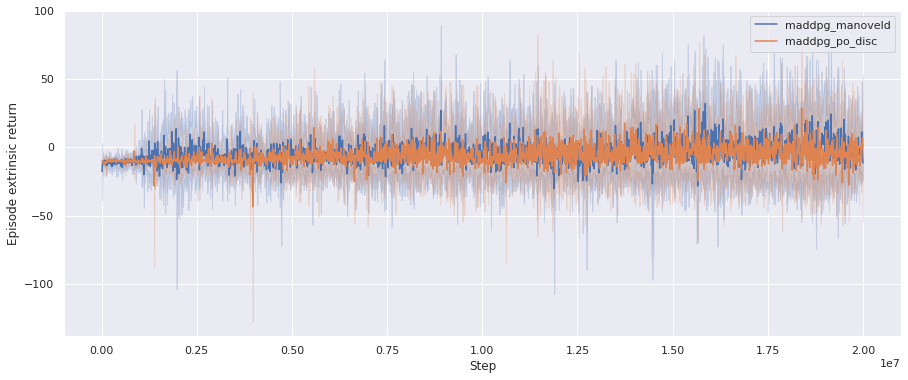

In [15]:
plot_runs([maddpg_manoveld, maddpg], y="Episode extrinsic return")

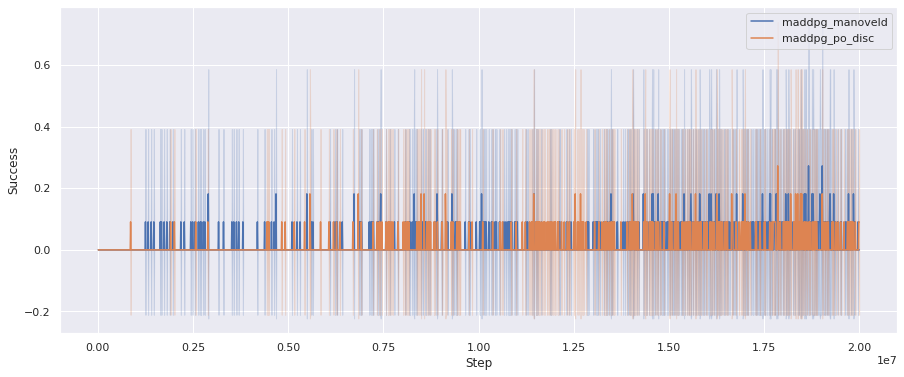

In [16]:
plot_runs([maddpg_manoveld, maddpg], y="Success")

Fully observable environment

100%|█████████████████████████████████████████████| 5/5 [00:08<00:00,  1.76s/it]


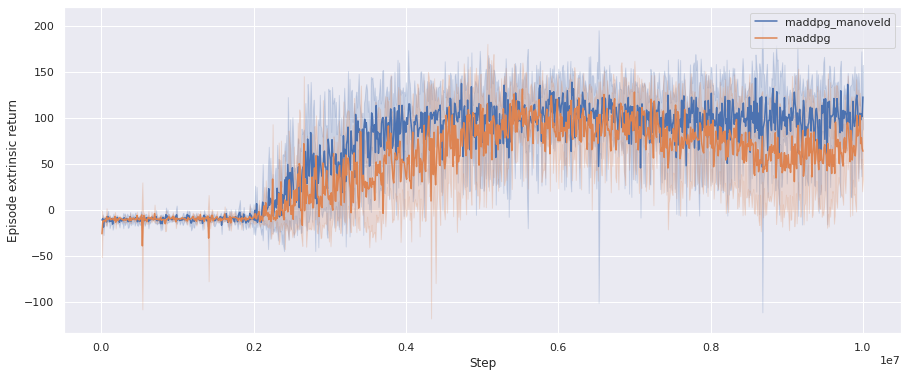

In [8]:
maddpg_manoveld = load_data_files("../models/coop_push_scenario_sparse/maddpg_manoveld_fo_disc/to_plot/",
                                 name="maddpg_manoveld")
maddpg_manoveld = set_fixed_steps(maddpg_manoveld, max_steps=10000000, step_range=10000, n_runs=5)

maddpg = load_data_files("../models/coop_push_scenario_sparse/mymaddpg_fo_rel_disc/to_plot/",
                                 name="maddpg")
maddpg = set_fixed_steps(maddpg, max_steps=10000000, step_range=10000, n_runs=5)
maddpg["Episode extrinsic return"] = maddpg["Episode return"]

plot_runs([maddpg_manoveld, maddpg], y="Episode extrinsic return")

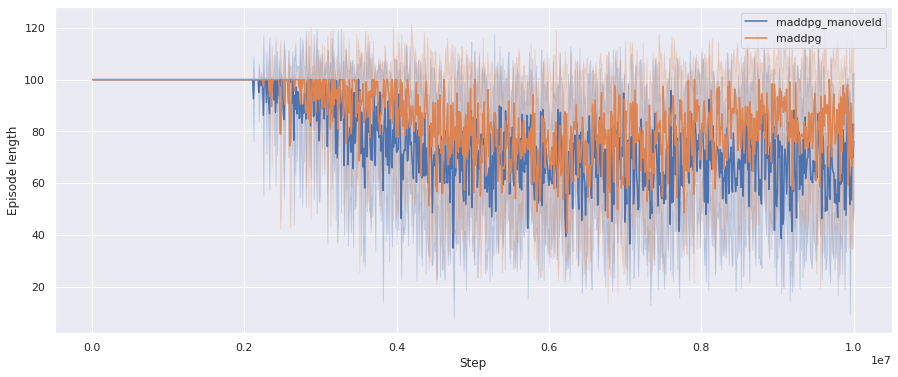

In [10]:
plot_runs([maddpg_manoveld, maddpg], y="Episode length")

100%|█████████████████████████████████████████████| 1/1 [00:01<00:00,  1.15s/it]


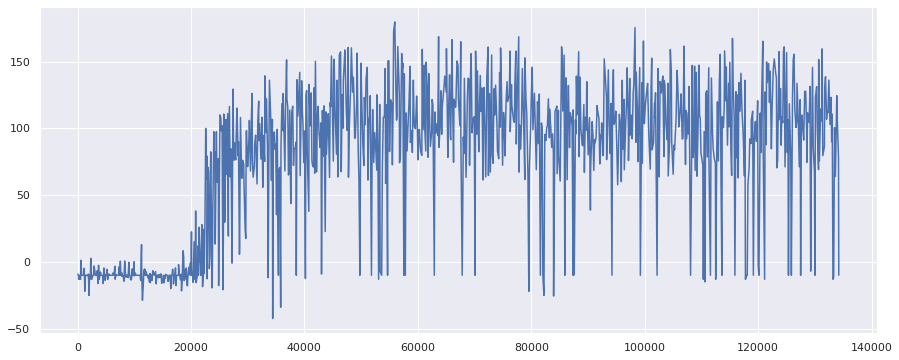

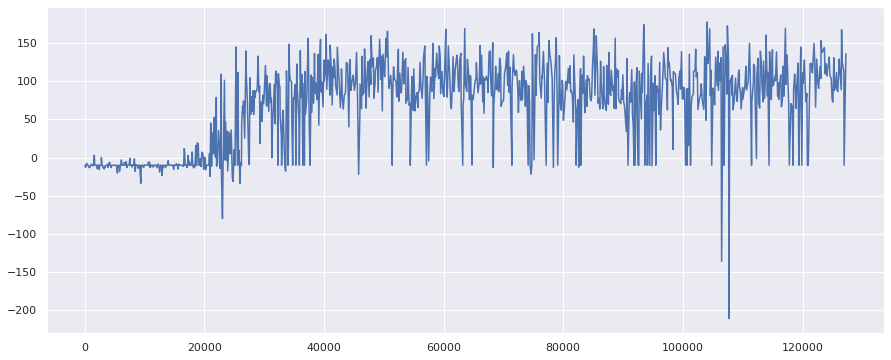

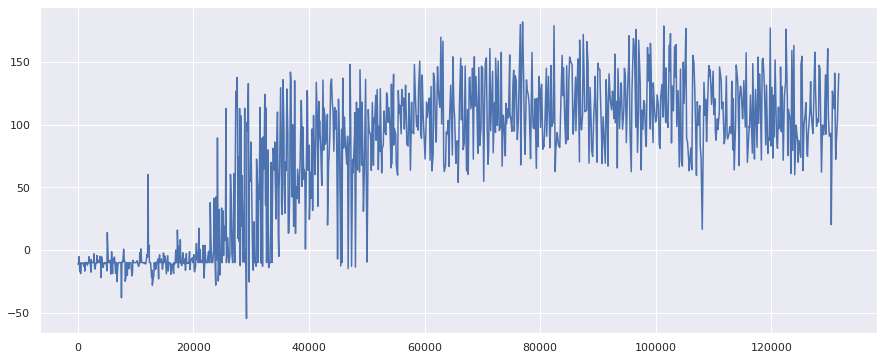

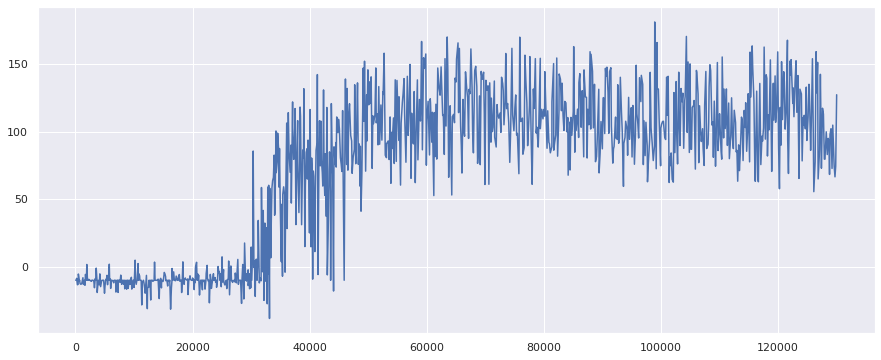

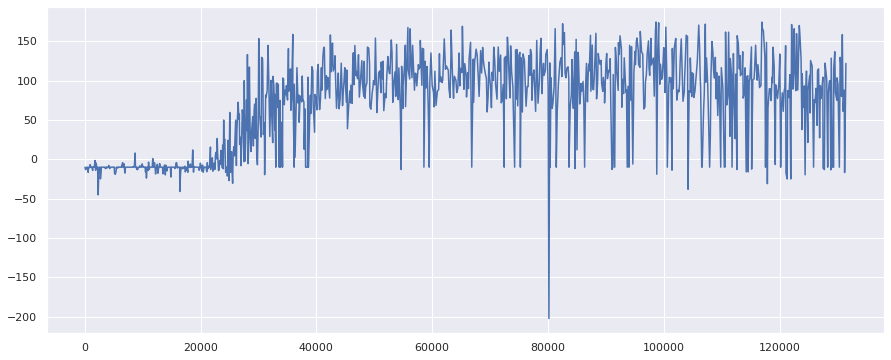

In [23]:
def load_plot_runs(path, y="Episode extrinsic return"):
    if os.path.isfile(path):
        data = pd.read_csv(path, index_col=0)
    else:
        for file in os.listdir(path):
            run = pd.read_csv(os.path.join(path, file), index_col=0)
            run = set_fixed_steps(run, step_range=10000, n_runs=1)
            fig1, ax1 = plt.subplots(figsize=(15, 6))
            ax1.plot(run[y])
load_plot_runs("../models/coop_push_scenario_sparse/maddpg_manoveld_fo_disc/to_plot/")

#### Harder environment

Train data

100%|███████████████████████████████████████████| 11/11 [00:36<00:00,  3.35s/it]


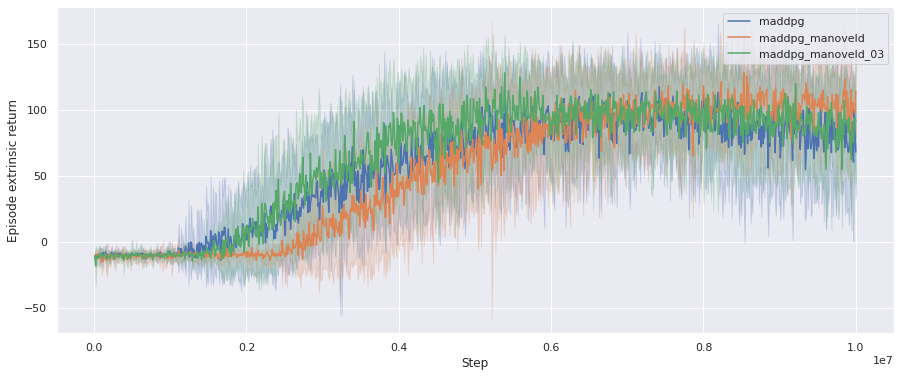

In [2]:
maddpg = load_data_files(
    "../models/coop_push_scenario_sparse_HARDER/maddpg_fo_disc/train_data/",
    name="maddpg")
maddpg_manoveld = load_data_files(
    "../models/coop_push_scenario_sparse_HARDER/maddpg_manoveld_fo_disc/train_data_10/",
    name="maddpg_manoveld")
maddpg_manoveld_03 = load_data_files(
    "../models/coop_push_scenario_sparse_HARDER/maddpg_manoveld_fo_disc/train_data_03/",
    name="maddpg_manoveld_03")
maddpg = set_fixed_steps(maddpg, max_steps=10000000, step_range=10000, n_runs=11)
maddpg_manoveld = set_fixed_steps(maddpg_manoveld, max_steps=10000000, step_range=10000, n_runs=11)
maddpg_manoveld_03 = set_fixed_steps(maddpg_manoveld_03, max_steps=10000000, step_range=10000, n_runs=11)

plot_runs([maddpg, maddpg_manoveld, maddpg_manoveld_03], y="Episode extrinsic return")

Eval data

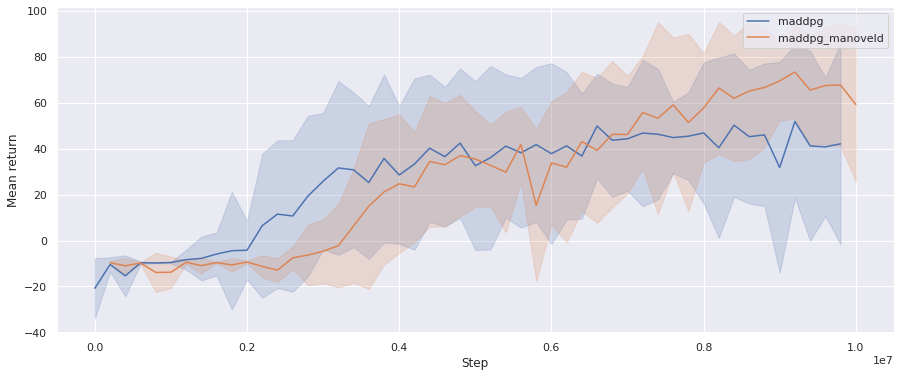

In [15]:
maddpg_eval = load_data_files(
    "../models/coop_push_scenario_sparse_HARDER/maddpg_fo_disc/eval_data/",
    name="maddpg")
maddpg_manoveld_eval = load_data_files(
    "../models/coop_push_scenario_sparse_HARDER/maddpg_manoveld_fo_disc/eval_data_10/",
    name="maddpg_manoveld")
plot_runs([maddpg_eval, maddpg_manoveld_eval], y="Mean return")

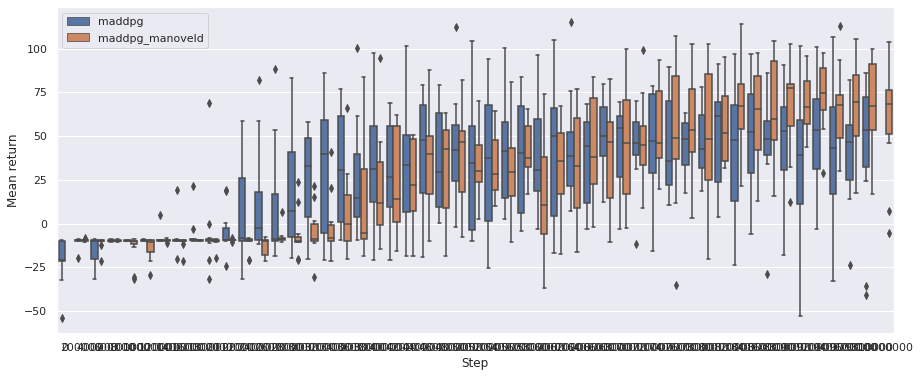

In [16]:
box_plot_runs([maddpg_eval, maddpg_manoveld_eval])